In [47]:
import rasterio
from rasterio.plot import show


src = "data\\raw\\dop_kacheln\\dop10rgbi_32_467_5763_1_nw_2020.jp2"
dst = "data\\processing\\dop_kacheln\\dop10rgbi_32_467_5763_1_nw_2020.tif"

## Importing image from .jp2 format

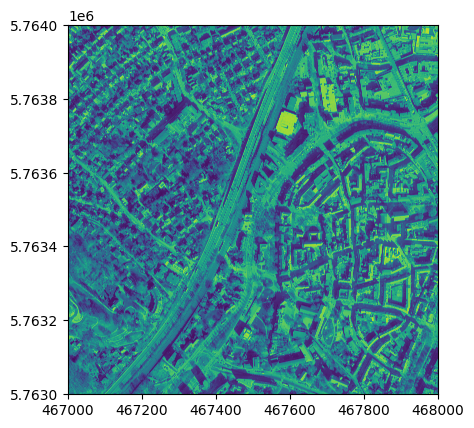

<AxesSubplot: >

In [4]:
img = rasterio.open(src)
show(img)

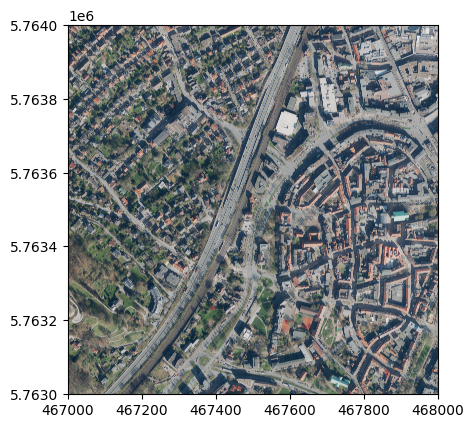

<AxesSubplot: >

In [52]:
show((img, (1, 2, 3)))

In [42]:
img.meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint8',
 'nodata': None,
 'width': 10000,
 'height': 10000,
 'count': 4,
 'crs': CRS.from_epsg(25832),
 'transform': Affine(0.1, 0.0, 467000.0,
        0.0, -0.1, 5764000.0)}

In [51]:
img.bounds

BoundingBox(left=467000.0, bottom=5763000.0, right=468000.0, top=5764000.0)

## Convert image to .tif format

In [51]:
img = rasterio.open(src)

# set profile with GeoTiff driver and keyowrd arguments
profile = img.profile
profile.update(count = 3, driver = 'GTiff')
profile['photometric'] = 'YCbCr'
profile['compress'] = 'JPEG'

# Convert to 3 bands 
img = img.read([1, 2, 3])

# Write the data to a new file
with rasterio.open(dst, 'w', **profile) as dst_dataset:
    dst_dataset.write(img)